In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 4000
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('../../0.Data/1.Interim/New/cluster.csv')

In [5]:
cols = ['TOT_DUE_AMT', 'Promise_%', 'A_avg', 'P_avg', 'acct_bhvr_scr_nbr', 'ar_bhvr_scr_nbr',
       'avg_paid_full_dy_cnt', 'crdt_buru_scr_nbr', 'cust_bhvr_scr_nbr',
       'cust_recls_scr_nbr', 'pmt_arng_scr_nbr', 'wirls_ln_cnt',
       'excpt_ovrd_ind', 'pyarr_scr_nbr', 'lst_bhvr_scr_nbr',
       'preferred_month_CALL_DT', 'preferred_day_of_monthCALL_DT',
       'preferred_weekdayCALL_DT', 'return_itm_180_dy_cnt',
       'return_itm_30_dy_cnt', 'Tenure',
       'MOBILITY_REGION_NAME_flagCentral', 'MOBILITY_REGION_NAME_flagEast',
       'MOBILITY_REGION_NAME_flagWest', 'ACCT_STS_AT_CALL_DATE_flagN',
       'ACCT_STS_AT_CALL_DATE_flagO', 'ACCT_STS_AT_CALL_DATE_flagS']

In [6]:
df_ = df[cols]

In [7]:
df_.columns.values

array(['TOT_DUE_AMT', 'Promise_%', 'A_avg', 'P_avg', 'acct_bhvr_scr_nbr',
       'ar_bhvr_scr_nbr', 'avg_paid_full_dy_cnt', 'crdt_buru_scr_nbr',
       'cust_bhvr_scr_nbr', 'cust_recls_scr_nbr', 'pmt_arng_scr_nbr',
       'wirls_ln_cnt', 'excpt_ovrd_ind', 'pyarr_scr_nbr',
       'lst_bhvr_scr_nbr', 'preferred_month_CALL_DT',
       'preferred_day_of_monthCALL_DT', 'preferred_weekdayCALL_DT',
       'return_itm_180_dy_cnt', 'return_itm_30_dy_cnt', 'Tenure',
       'MOBILITY_REGION_NAME_flagCentral', 'MOBILITY_REGION_NAME_flagEast',
       'MOBILITY_REGION_NAME_flagWest', 'ACCT_STS_AT_CALL_DATE_flagN',
       'ACCT_STS_AT_CALL_DATE_flagO', 'ACCT_STS_AT_CALL_DATE_flagS'], dtype=object)

In [10]:
# Run GMM 
from sklearn.mixture import GMM

In [31]:
%%time
gmm = GMM(n_components=7).fit(df_)
labels = gmm.predict(df_)

/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklea

CPU times: user 1min 57s, sys: 17.5 s, total: 2min 14s
Wall time: 36.4 s


In [32]:
gmm.aic(df_)

/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


63000718.50460618

In [33]:
gmm.bic(df_)

/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


63005184.718103044

In [34]:
cluster_2 = df_.copy()

In [35]:
cluster_2['labels'] = labels

In [38]:
cluster_2.columns.values

array(['TOT_DUE_AMT', 'Promise_%', 'Adjust_%', 'A_avg', 'P_avg',
       'acct_bhvr_scr_nbr', 'ar_bhvr_scr_nbr', 'avg_paid_full_dy_cnt',
       'crdt_buru_scr_nbr', 'cust_bhvr_scr_nbr', 'cust_recls_scr_nbr',
       'pmt_arng_scr_nbr', 'wirls_ln_cnt', 'excpt_ovrd_ind',
       'pyarr_scr_nbr', 'lst_bhvr_scr_nbr', 'preferred_month_CALL_DT',
       'preferred_day_of_monthCALL_DT', 'preferred_weekdayCALL_DT',
       'return_itm_180_dy_cnt', 'return_itm_30_dy_cnt', 'Tenure',
       'MOBILITY_REGION_NAME_flagCentral', 'MOBILITY_REGION_NAME_flagEast',
       'MOBILITY_REGION_NAME_flagWest', 'ACCT_STS_AT_CALL_DATE_flagN',
       'ACCT_STS_AT_CALL_DATE_flagO', 'ACCT_STS_AT_CALL_DATE_flagS', 'BAN',
       'labels'], dtype=object)

In [41]:
cluster_2['labels'].value_counts()/len(cluster_2)

2   0.31
6   0.31
4   0.16
1   0.08
0   0.07
3   0.03
5   0.03
Name: labels, dtype: float64

In [42]:
%%time
gmm2 = GMM(n_components=5).fit(df_)
labels2 = gmm2.predict(df_)

/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklea

CPU times: user 1min 37s, sys: 14.5 s, total: 1min 52s
Wall time: 24.3 s


In [43]:
cluster_2['labels2'] = labels2

In [45]:
cluster_2['labels2'].value_counts()/len(cluster_2)

2   0.57
3   0.17
0   0.14
1   0.08
4   0.04
Name: labels2, dtype: float64

In [46]:
%%time
gmm3 = GMM(n_components=6).fit(df_)
labels3 = gmm3.predict(df_)

/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklea

CPU times: user 1min 26s, sys: 16.1 s, total: 1min 42s
Wall time: 30.9 s


In [47]:
cluster_2['labels3'] = labels3

In [48]:
cluster_2['labels3'].value_counts()/len(cluster_2)

3   0.31
1   0.31
5   0.17
0   0.08
2   0.08
4   0.05
Name: labels3, dtype: float64

In [49]:
# AIC BIC Analysis 

In [50]:
print('7 clusters: AIC- ', gmm.aic(X=df_), ', BIC - ',  gmm.bic(X=df_))
print('6 clusters: AIC- ', gmm3.aic(X=df_), ', BIC - ',  gmm3.bic(X=df_))
print('5 clusters: AIC- ', gmm2.aic(X=df_), ', BIC - ',  gmm2.bic(X=df_))

/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


7 clusters: AIC-  63000718.5046 , BIC -  63005184.7181


/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


6 clusters: AIC-  64958951.078 , BIC -  64962777.7124


/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/app/anaconda2/python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


5 clusters: AIC-  65745555.8667 , BIC -  65748742.922


In [55]:
import math

In [63]:
def aic_bic_likelihood(val, min_val):
    print(math.exp(min_val-val)/2)

In [64]:
aic_bic_likelihood(65748742.922,63005184.7181)

0.0


In [11]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt



In [12]:
# k means determine k
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_)
    kmeanModel.fit(df_)
    distortions.append(sum(np.min(cdist(df_, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_.shape[0])
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13


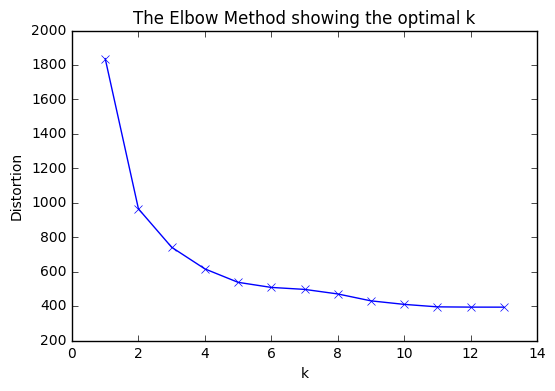

In [13]:

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [47]:
cluster1 = df.copy()

In [48]:
cluster1['label'] = labels

In [49]:
cluster1.to_csv('../../0.Data/1.Interim/New/cluster1.csv')

In [50]:
import numpy as np
from sklearn.manifold import TSNE

In [57]:
c1 = cluster1.head(20)

In [59]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [62]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0)

In [64]:
c1_embedded = manifold.TSNE(n_components=2, init='random', random_state=0).fit_transform(c1)

In [143]:
tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(X_1)

In [150]:
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

circles, perplexity=5 in 2.6 sec
circles, perplexity=30 in 2.4 sec
circles, perplexity=50 in 3.1 sec
circles, perplexity=100 in 4.8 sec


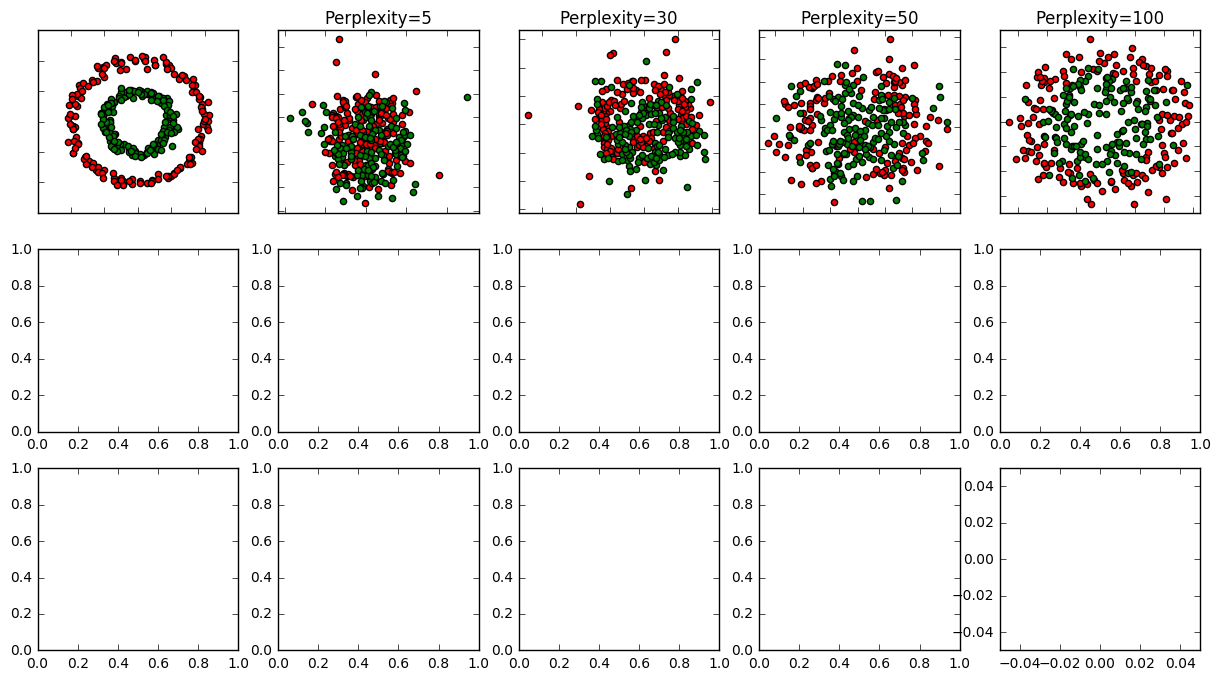

In [151]:
plt.show()

In [154]:
Y.ndim

2

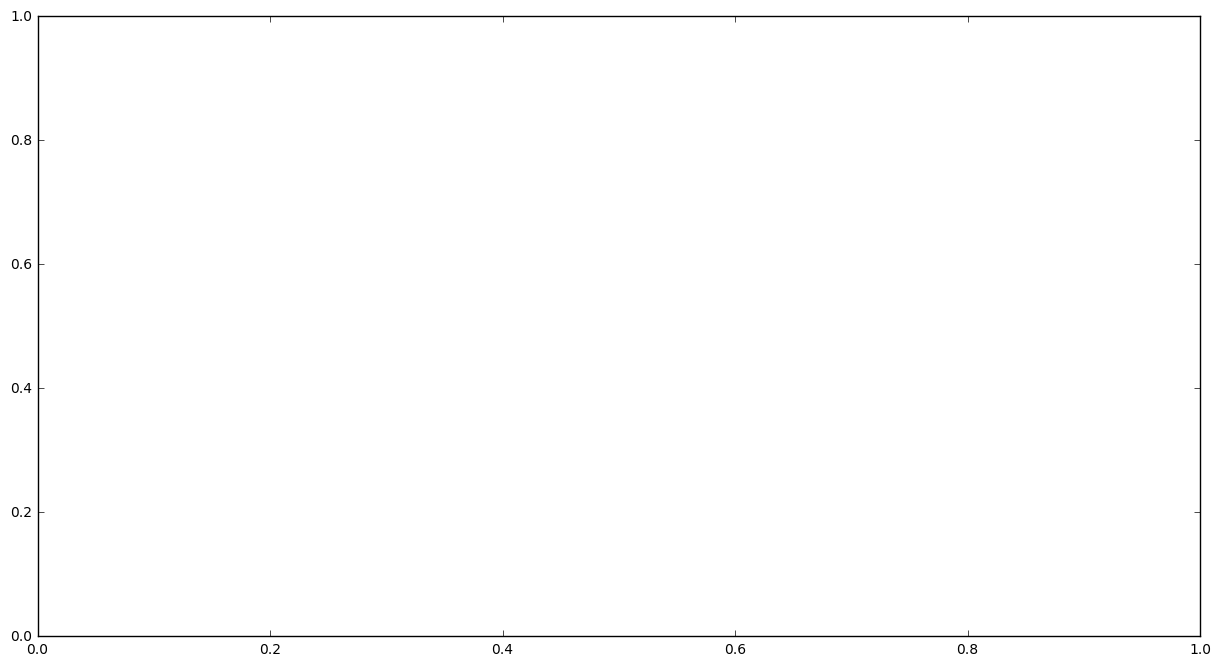

In [149]:
(fig, subplots) = plt.subplots(1,1, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

ax.scatter(Y[0, 0], Y[0, 1], c="r")
ax.scatter(Y[1, 0], Y[1, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.show()

In [79]:
df.excpt_ovrd_ind = df.excpt_ovrd_ind.replace('Y', int(0))

In [81]:
df.drop(['status_change_count', 'status_change_flag'], axis = 1, inplace = True)

In [45]:
df2['src_tot'] = (df2.APP_count + df2.IVR_count + df2.KIO_count + df2.REP_count + df2.SMS_count + df2.WEB_count)

In [47]:
df2['App_%'] = df2.APP_count*100/df2.src_tot

In [48]:
df2['Web_%'] = df2.WEB_count*100/df2.src_tot
df2['IVR_%'] = df2.IVR_count*100/df2.src_tot
df2['KIO_%'] = df2.KIO_count*100/df2.src_tot
df2['Rep_%'] = df2.REP_count*100/df2.src_tot
df2['SMS_%'] = df2.SMS_count*100/df2.src_tot

In [49]:
df2['pymt_tot'] = (df2.MA_count + df2.CC_count + df2.DD_count + df2.ME_count + df2.ML_count + df2.CK_count + df2.EF_count)

In [59]:
df2['EF_%'] = df2.EF_count*100/df2.pymt_tot

In [60]:
df2['CK_%'] = df2.CK_count*100/df2.pymt_tot
df2['ML_%'] = df2.ML_count*100/df2.pymt_tot
df2['ME_%'] = df2.ME_count*100/df2.pymt_tot
df2['DD_%'] = df2.DD_count*100/df2.pymt_tot
df2['CC_%'] = df2.CC_count*100/df2.pymt_tot
df2['MA_%'] = df2.MA_count*100/df2.pymt_tot

In [66]:
new_vars = ['MA_%', 'BAN', 'EF_%']

In [67]:
df_1 = df2[new_vars]

In [69]:
df = df.merge(df_1, on = 'BAN', how = 'left')

In [72]:
len(df.columns.values)

44

In [56]:
df = df.merge(df_1, on = 'BAN', how = 'left')

In [71]:
df.to_csv('../../0.Data/1.Interim/New/merge_4.csv')

In [49]:
segment = ['BAN','TOT_DUE_AMT', 'MOBILITY_REGION_NAME', 'ACCT_STS_AT_CALL_DATE', 'status_change_count', 'status_change_flag', \
'Promise_%', 'Adjust_%', 'A_avg', 'P_avg', 'acct_bhvr_scr_nbr', 'ar_bhvr_scr_nbr' , 'avg_paid_full_dy_cnt', 'crdt_buru_scr_nbr',\
'cust_bhvr_scr_nbr', 'cust_recls_scr_nbr', 'pmt_arng_scr_nbr', 'wirls_ln_cnt', 'excpt_ovrd_ind',  'pyarr_scr_nbr', \
'lst_bhvr_scr_nbr', 'preferred_month_CALL_DT', 'preferred_day_of_monthCALL_DT', 'preferred_weekdayCALL_DT', \
'return_itm_180_dy_cnt', 'return_itm_30_dy_cnt', 'Tenure']

In [45]:
profile = ['attuid', 'BAN']

In [50]:
df_ = df[segment]

In [56]:
df_.dtypes

BAN                                    int64
TOT_DUE_AMT                          float64
MOBILITY_REGION_NAME                  object
ACCT_STS_AT_CALL_DATE                 object
status_change_count                    int64
status_change_flag                      bool
Promise_%                            float64
Adjust_%                             float64
A_avg                                float64
P_avg                                float64
acct_bhvr_scr_nbr                    float64
ar_bhvr_scr_nbr                      float64
avg_paid_full_dy_cnt                 float64
crdt_buru_scr_nbr                    float64
cust_bhvr_scr_nbr                    float64
cust_recls_scr_nbr                   float64
pmt_arng_scr_nbr                     float64
wirls_ln_cnt                         float64
excpt_ovrd_ind                        object
pyarr_scr_nbr                        float64
lst_bhvr_scr_nbr                       int64
preferred_month_CALL_DT              float64
preferred_

In [48]:
df_.MOBILITY_REGION_NAME.value_counts()

East       166637
Central    137891
West        72594
Name: MOBILITY_REGION_NAME, dtype: int64

In [21]:
# Counts and Flags for all variables with codes 
def counts_and_flags(df,col):
    # Create count column names 
    col_names = ['BAN'] + [(col + '_count' + str(i)) for i in df[col].unique()] + [(col + '_flag' + str(i)) for i in df[col].unique()]
    
    # Populate columns
    
    # -- variable init
    col_values = df[col].unique()                                   # Unique column values
    value_dict = {key: [] for key in col_names}                     # Dictionary to hold the values for unique BANS
    
    for ban in df['BAN'].unique():
        ban_df = df.loc[df.BAN == ban]
        val = ban_df[col].value_counts()
        value_dict['BAN'].append(ban)
        for i in col_values:
            try:
                value = val[i]
                value_dict[col + '_count' + str(i)].append(value)
                value_dict[col + '_flag' + str(i)].append(int(1))
            except:
                value = 0
                value_dict[col + '_count' + str(i)].append(value)
                value_dict[col + '_flag' + str(i)].append(int(0))
    counts_and_flags = pd.DataFrame.from_dict(value_dict)
    return (counts_and_flags)

In [52]:
%%time
df_mobility = counts_and_flags(df_,'MOBILITY_REGION_NAME' )

CPU times: user 18min 21s, sys: 1.81 s, total: 18min 23s
Wall time: 18min 23s


In [53]:
df_mobility.to_csv('df_mobility.csv', index = False)

In [54]:
df_ = df_.merge(df_mobility, on = 'BAN', how = 'left')

In [55]:
df_.to_csv('../../0.Data/1.Interim/New/merge_1.csv', index = False)

In [22]:
df_acct_status= counts_and_flags(df,'ACCT_STS_AT_CALL_DATE')

In [23]:
df_acct_status.columns.values

array(['ACCT_STS_AT_CALL_DATE_countN', 'ACCT_STS_AT_CALL_DATE_countO',
       'ACCT_STS_AT_CALL_DATE_countS', 'ACCT_STS_AT_CALL_DATE_flagN',
       'ACCT_STS_AT_CALL_DATE_flagO', 'ACCT_STS_AT_CALL_DATE_flagS', 'BAN'], dtype=object)

In [27]:
df = df.merge(df_acct_status, on = 'BAN', how = 'left')

In [28]:
df.drop(['ACCT_STS_AT_CALL_DATE_countN', 'ACCT_STS_AT_CALL_DATE_countO',
       'ACCT_STS_AT_CALL_DATE_countS'], axis = 1, inplace = True)

In [33]:
df.to_csv('../../0.Data/1.Interim/New/merge_3.csv', index = False)